In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score


import warnings
warnings.filterwarnings('ignore')

#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv(r'C:\Users\SOOQ ELASER\raw.githubusercontent.com_dsrscientist_dataset1_master_titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape
#the shape of Data Set is 891 rows and 11 columns

(891, 12)

In [4]:
df = df.drop('Cabin',axis=1)
df
#for prediction we dont wanted any cabin data hence droping the same
#Dropping 'Cabin' since of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
df.isnull().sum()
#needs to check weather null value is present or not one more method df.isnull().sum()
#there is  null value in dataset in age and embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
df['Age']= df['Age'].fillna(df['Age'].mean())

#fill null value using this method there are many methoda also available to fill null

In [7]:
df.isnull().sum()
# filled the null value using method 
#Embarked not filled as its string 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
df.duplicated().sum()
#checked any dupliacte available or not so no value present

0

In [9]:
df.describe()
#in int there is no null value in data set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.nunique()
#needs to check how many unique value in dataset
#survived has 2 categories
#pclass has 3 categories
# sex has 2 categories
#sibsp & parch has 7 categories
#Embarked has 3 categories

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [11]:
df['Survived'].unique()
#first check unique values 0 and 1

array([0, 1], dtype=int64)

In [12]:
df['Survived'].value_counts()
# how many survived in each categorie Survived 

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

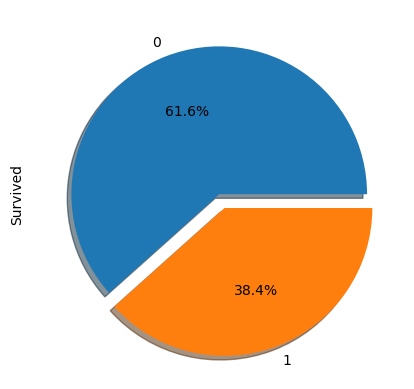

In [13]:
df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                       autopct='%2.1f%%',shadow=True)
#survive value percentage

<AxesSubplot:xlabel='Survived', ylabel='count'>

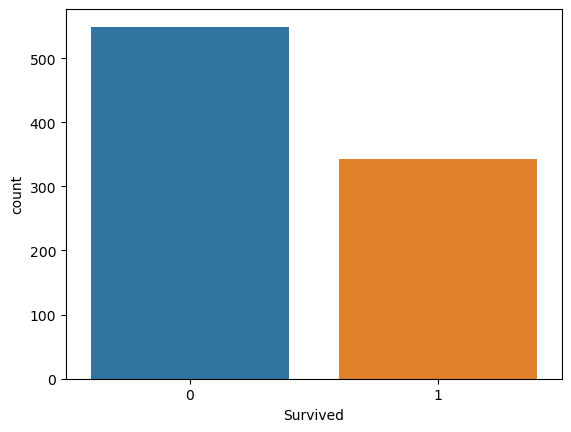

In [14]:
sns.countplot(df["Survived"])
#countplot for survived

In [15]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

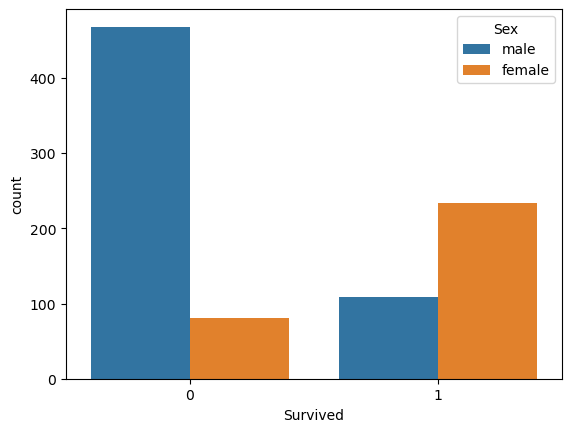

In [16]:
sns.countplot(df["Survived"], hue=df["Sex"])
#countplot for survived and sex of different catrgories
#count of men is more than women
#but more female survived if chart compare

In [17]:
pd.crosstab(df.Pclass,df.Survived, margins=True)
#compare between who is in pclass and how many survived
#survived passenger ratir is quite high 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [18]:
pd.crosstab(df.SibSp,df.Survived, margins=True)
#compare between who is in SibSp and how many survived
#if compare p class and sibsp in pclass passenger is less but srvived more but in sibsp number is very high of passenger but survived very low because in lower class

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [19]:

pd.crosstab(df.Embarked,df.Survived, margins=True)
#also for embarked 

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [20]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True)
#comparing between sex , survived with Pclass
#survival of female is very high 
#women give first priority as compare to men

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [21]:
print('Oldest Passenger was of:',df['Age'].max())
print('Youngest Passenger was of:',df['Age'].min())
print('Average Age on th ship :',df['Age'].mean())
#check  max , min  and mean age comparison passenger onboard

Oldest Passenger was of: 80.0
Youngest Passenger was of: 0.42
Average Age on th ship : 29.699117647058763


In [22]:
df['Embarked'] = df['Embarked'].fillna(method ='pad')
#filled null value 

In [23]:
df.isnull().sum()
#xhecked again if any value is there

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

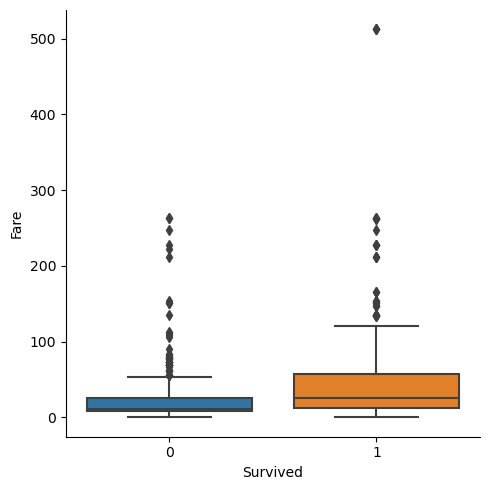

In [24]:
sns.catplot(x="Survived",y="Fare",data=df, kind="box")
#fare difference someone paidi huge amount

In [25]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
#nothing to do with name & Ticket

In [26]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
df['Sex']=df['Sex'].apply(lambda df:d[df])
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [27]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = [ 'Embarked']
#Categorical_features & Numerical_features seperate to check box plot

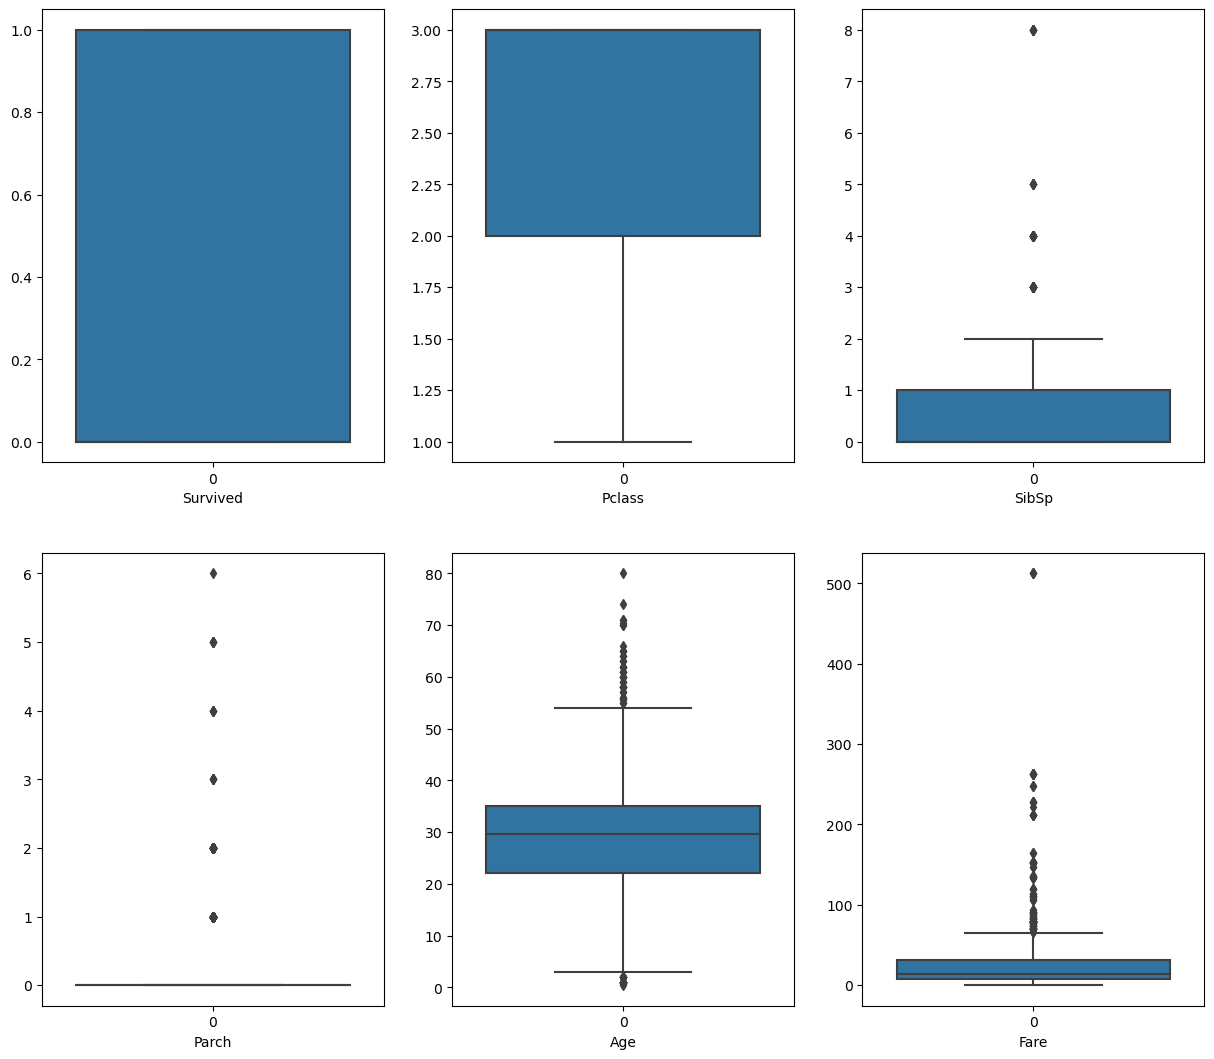

In [28]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in Numerical_features:
    if plotnumber <=10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show()   
# Identifying the outliers using boxplot in train dataset
#We can see that continous features like age & fare contains outliers.

In [29]:
#needs tp fix outliers using IQR method
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [30]:
age = (q3.Age + (1.5 * iqr.Age))

abc = np.where(df['Age'] > age)

df = df.drop(df.index[abc])

df.reset_index()
#for age 


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,0,22.000000,1,0,7.2500,S
1,1,2,1,1,1,38.000000,1,0,71.2833,C
2,2,3,1,3,1,26.000000,0,0,7.9250,S
3,3,4,1,1,1,35.000000,1,0,53.1000,S
4,4,5,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
844,886,887,0,2,0,27.000000,0,0,13.0000,S
845,887,888,1,1,1,19.000000,0,0,30.0000,S
846,888,889,0,3,1,29.699118,1,2,23.4500,S
847,889,890,1,1,0,26.000000,0,0,30.0000,C


In [31]:
fare = (q3.Fare + (1.5 * iqr.Fare))

abc = np.where(df['Fare'] > fare)

df = df.drop(df.index[abc])

df.reset_index()
#for fare

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,0,22.000000,1,0,7.2500,S
1,2,3,1,3,1,26.000000,0,0,7.9250,S
2,3,4,1,1,1,35.000000,1,0,53.1000,S
3,4,5,0,3,0,35.000000,0,0,8.0500,S
4,5,6,0,3,0,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
738,886,887,0,2,0,27.000000,0,0,13.0000,S
739,887,888,1,1,1,19.000000,0,0,30.0000,S
740,888,889,0,3,1,29.699118,1,2,23.4500,S
741,889,890,1,1,0,26.000000,0,0,30.0000,C


In [32]:
age = (q1.Age -(1.5 * iqr.Age))

abc= np.where(df['Age'] < age)

df = df.drop(df.index[abc])

df.reset_index()
# this is for age but for lower side min side alos the outlier needs to trest that as well

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,0,22.000000,1,0,7.2500,S
1,2,3,1,3,1,26.000000,0,0,7.9250,S
2,3,4,1,1,1,35.000000,1,0,53.1000,S
3,4,5,0,3,0,35.000000,0,0,8.0500,S
4,5,6,0,3,0,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
716,886,887,0,2,0,27.000000,0,0,13.0000,S
717,887,888,1,1,1,19.000000,0,0,30.0000,S
718,888,889,0,3,1,29.699118,1,2,23.4500,S
719,889,890,1,1,0,26.000000,0,0,30.0000,C


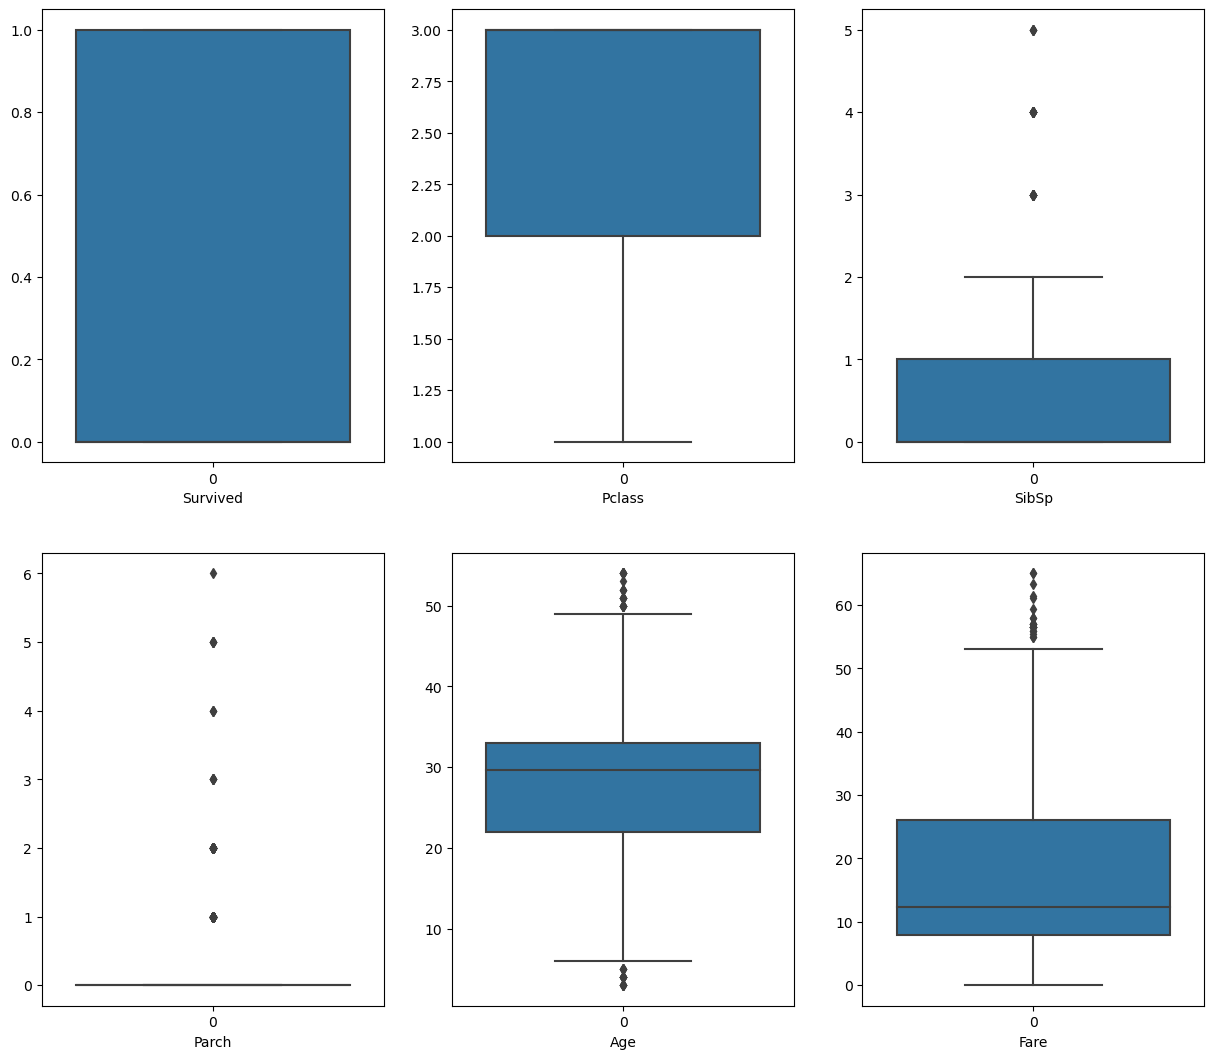

In [33]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in Numerical_features:
    if plotnumber <=10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show()  
#now many outliers has been removed not complterly but few left

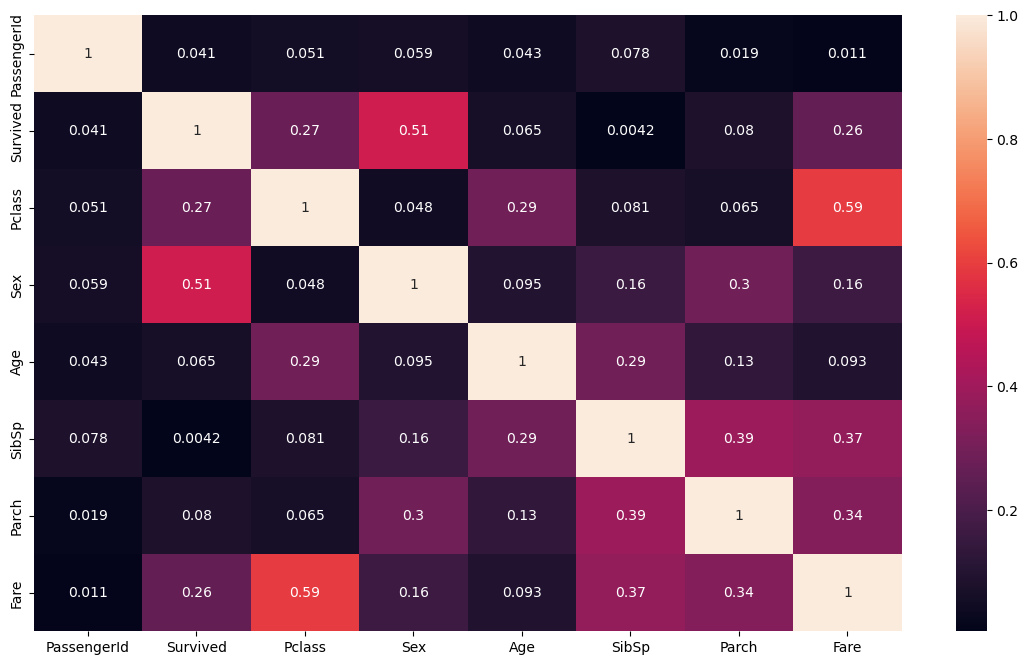

In [34]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
#check correlation between them pclass and fare
#check correlation between them Suvived and sex


In [35]:
df.shape
#the shape of Data Set is 721 rows and 10 columns

(721, 9)

In [36]:
# Using Label encoder for transforming Categorical data
#first we have done with another technique now done with another technique
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2
2,3,1,3,1,26.000000,0,0,7.9250,2
3,4,1,1,1,35.000000,1,0,53.1000,2
4,5,0,3,0,35.000000,0,0,8.0500,2
5,6,0,3,0,29.699118,0,0,8.4583,1


In [37]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [38]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)

In [52]:

#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_scale, Y, test_size=0.3, random_state=42)

In [54]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accurcy {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [55]:
log = LogisticRegression()

log.fit(x_train,y_train)


LogisticRegression()

In [56]:
y_pred = log.predict_proba(x_test)
y_pred

array([[0.19879436, 0.80120564],
       [0.39409026, 0.60590974],
       [0.93329491, 0.06670509],
       [0.86664808, 0.13335192],
       [0.79883268, 0.20116732],
       [0.51715744, 0.48284256],
       [0.31215917, 0.68784083],
       [0.45367715, 0.54632285],
       [0.61857334, 0.38142666],
       [0.52756447, 0.47243553],
       [0.90237466, 0.09762534],
       [0.78502195, 0.21497805],
       [0.42789987, 0.57210013],
       [0.89231833, 0.10768167],
       [0.56912436, 0.43087564],
       [0.83946552, 0.16053448],
       [0.33011968, 0.66988032],
       [0.89161492, 0.10838508],
       [0.7880786 , 0.2119214 ],
       [0.40565788, 0.59434212],
       [0.54178113, 0.45821887],
       [0.8869231 , 0.1130769 ],
       [0.83807059, 0.16192941],
       [0.71440131, 0.28559869],
       [0.35970599, 0.64029401],
       [0.8886962 , 0.1113038 ],
       [0.97149985, 0.02850015],
       [0.20254706, 0.79745294],
       [0.77129506, 0.22870494],
       [0.88839321, 0.11160679],
       [0.

In [74]:
cv_score = (cross_val_score(reg, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 77.81226053639847


In [57]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score79.17%
============testresult===============
accurcy 81.11%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       143
           1       0.73      0.70      0.72        74

    accuracy                           0.81       217
   macro avg       0.79      0.78      0.79       217
weighted avg       0.81      0.81      0.81       217



In [59]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accurcy 76.50%
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       143
           1       0.66      0.65      0.65        74

    accuracy                           0.76       217
   macro avg       0.74      0.74      0.74       217
weighted avg       0.76      0.76      0.76       217



In [61]:
#import necessary liabariers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [62]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [64]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [66]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=4)

clf.fit(x_train,y_train)
#best params and traning data 

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=4)

In [68]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better

============trainresult===============
accuracy_score83.53%
============testresult===============
accurcy 82.03%
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       143
           1       0.73      0.74      0.74        74

    accuracy                           0.82       217
   macro avg       0.80      0.80      0.80       217
weighted avg       0.82      0.82      0.82       217



In [70]:
cv_score = (cross_val_score(clf, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   


Cross Validation Score: 79.61015325670499


In [76]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)
#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

============trainresult===============
accuracy_score100.00%
============testresult===============
accurcy 82.49%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       143
           1       0.78      0.68      0.72        74

    accuracy                           0.82       217
   macro avg       0.81      0.79      0.80       217
weighted avg       0.82      0.82      0.82       217



In [78]:
cv_score = (cross_val_score(RFC, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 81.97413793103448


In [79]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=15)
KNC.fit(x_train,y_train)
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with !% hence done ith that

============trainresult===============
accuracy_score82.94%
============testresult===============
accurcy 81.57%
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       143
           1       0.77      0.65      0.71        74

    accuracy                           0.82       217
   macro avg       0.80      0.78      0.79       217
weighted avg       0.81      0.82      0.81       217



In [84]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 7}

In [85]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 7)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [86]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accurcy 80.65%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       143
           1       0.77      0.62      0.69        74

    accuracy                           0.81       217
   macro avg       0.79      0.76      0.77       217
weighted avg       0.80      0.81      0.80       217

============trainresult===============
accuracy_score83.93%


In [88]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifier 

============trainresult===============
accuracy_score91.47%
============testresult===============
accurcy 82.95%
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       143
           1       0.79      0.68      0.73        74

    accuracy                           0.83       217
   macro avg       0.82      0.79      0.80       217
weighted avg       0.83      0.83      0.83       217



In [90]:
cv_score = (cross_val_score(GBC, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 79.20977011494253


In [92]:
# xgboost model
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)
metric_score(XB,x_train,x_test,y_train,y_test,train = True)
metric_score(XB,x_train,x_test,y_train,y_test,train = False)
 

============trainresult===============
accuracy_score100.00%
============testresult===============
accurcy 80.18%
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       143
           1       0.75      0.64      0.69        74

    accuracy                           0.80       217
   macro avg       0.79      0.76      0.77       217
weighted avg       0.80      0.80      0.80       217



In [94]:
from sklearn.metrics import RocCurveDisplay

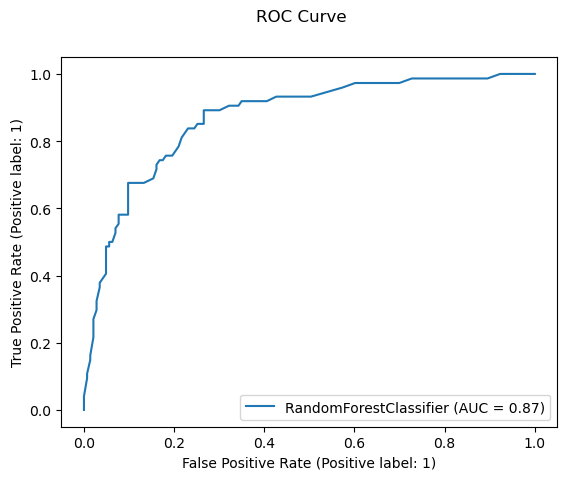

In [104]:
disp = RocCurveDisplay.from_estimator(RFC, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()
#I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 87%

In [ ]:
#all data together

In [115]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


In [116]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)



KNeighborsClassifier()

In [119]:
lr.score(x_test,y_test)
dt.fit(x_test,y_test)
rf.fit(x_test,y_test)
kn.fit(x_test,y_test)

KNeighborsClassifier()

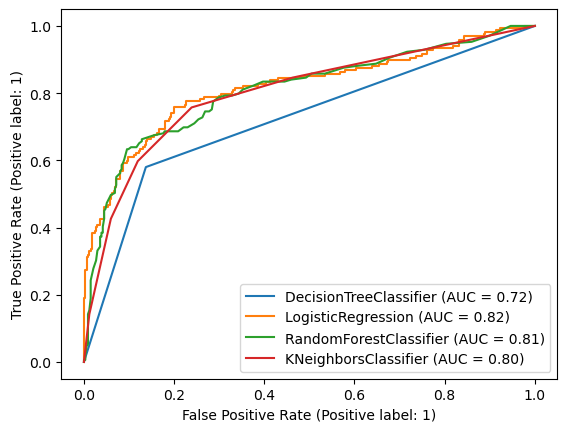

In [120]:
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax = disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax = disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax = disp.ax_)

plt.legend(prop={'size' : 10},loc = 'lower right')
plt.show()